In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=0.5)

In [3]:
# Load the data into DataFrames
train_users = pd.read_csv('D:/Study/Springboard/Capestone Project/Airbnb New User Bookings/Data/train_users_2.csv')
test_users = pd.read_csv('D:/Study/Springboard/Capestone Project/Airbnb New User Bookings/Data/test_users.csv')

In [4]:
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

users.head()

C:\Users\Abhilash Naik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB


In [6]:
users.describe()

,age,signup_flow,timestamp_first_active
count,158681.000000,275547.000000,2.755470e+05
mean,47.145310,4.291965,2.013310e+13
std,142.629468,8.794313,9.146438e+09
min,1.000000,0.000000,2.009032e+13
25%,28.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,2.014010e+13
75%,42.000000,1.000000,2.014062e+13
max,2014.000000,25.000000,2.014093e+13


In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

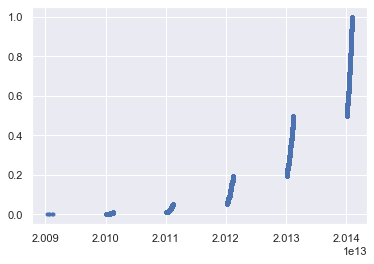

In [27]:
# Compute ECDF for timestamp_first_active data: x_timestamp, y_timestamp
x_timestamp, y_timestamp = ecdf(users.timestamp_first_active)

sns.set()
# Generate plot
plt.plot(x_timestamp,y_timestamp,marker='.',linestyle='none')

plt.show()

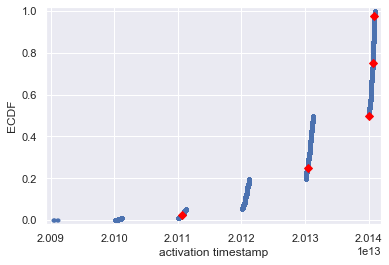

In [8]:
# Compute ECDF for timestamp_first_active data: x_timestamp, y_timestamp
x_timestamp, y_timestamp = ecdf(users.timestamp_first_active)

sns.set()
# Generate plot
plt.plot(x_timestamp,y_timestamp,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_=plt.xlabel("activation timestamp")
_=plt.ylabel("ECDF")

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_timestamp
ptiles_timestamp=np.percentile(users.timestamp_first_active,percentiles)

# Print the result
#print(ptiles_timestamp)
p=percentiles/100
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_timestamp, p, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

In [9]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_timestamp=np.percentile(users.timestamp_first_active,percentiles)

# Print the result
print(ptiles_timestamp)

[2.01107252e+13 2.01304032e+13 2.01401032e+13 2.01406182e+13
 2.01409192e+13]


In [10]:
ecdf(users.timestamp_first_active)

(array([20090319043255, 20090523174809, 20090609231247, ...,
        20140930235408, 20140930235430, 20140930235901], dtype=int64),
 array([3.62914494e-06, 7.25828987e-06, 1.08874348e-05, ...,
        9.99992742e-01, 9.99996371e-01, 1.00000000e+00]))

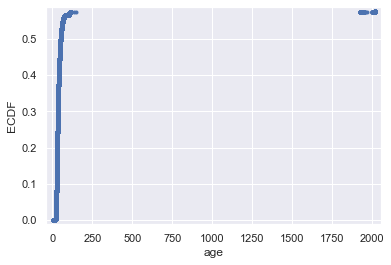

In [11]:
# Compute ECDF for age data: x_vers, y_vers
x_age, y_age = ecdf(users.age)

# Generate plot
plt.plot(x_age,y_age,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_age
ptiles_age=np.percentile(users.age,percentiles)

# Print the result
#print(ptiles_timestamp)
p=percentiles/100
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_age, p, marker='D', color='red',
         linestyle='none')

# Label the axes
plt.xlabel("age")
plt.ylabel("ECDF")



# Display the plot
plt.show()

In [12]:
ecdf(users.age)

(array([ 1.,  1.,  1., ..., nan, nan, nan]),
 array([3.62914494e-06, 7.25828987e-06, 1.08874348e-05, ...,
        9.99992742e-01, 9.99996371e-01, 1.00000000e+00]))

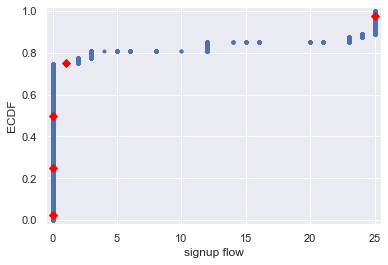

In [13]:
# Compute ECDF for user data: x_vers, y_vers
x_flow, y_flow = ecdf(users.signup_flow)

# Generate plot
plt.plot(x_flow,y_flow,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.xlabel("signup flow")
plt.ylabel("ECDF")

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_flow
ptiles_flow=np.percentile(users.signup_flow,percentiles)

# Print the result
#print(ptiles_timestamp)
p=percentiles/100
# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_flow, p, marker='D', color='red',
         linestyle='none')

# Display the plot
plt.show()

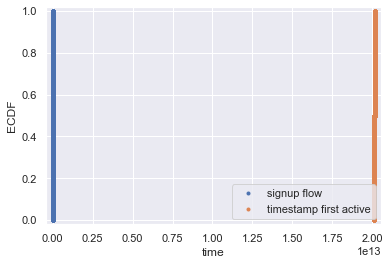

In [14]:

# Compute ECDFs
x_flow,y_flow=ecdf(users.signup_flow)
#x_created,y_created=ecdf(users.date_account_created)
x_timestamp,y_timestamp=ecdf(users.timestamp_first_active)

# Plot all ECDFs on the same plot
_=plt.plot(x_flow,y_flow,marker='.',linestyle='none')
#_=plt.plot(x_created,y_created,marker='.',linestyle='none')
_=plt.plot(x_timestamp,y_timestamp,marker='.',linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('signup flow', 'timestamp first active'), loc='lower right')
_ = plt.xlabel('time')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

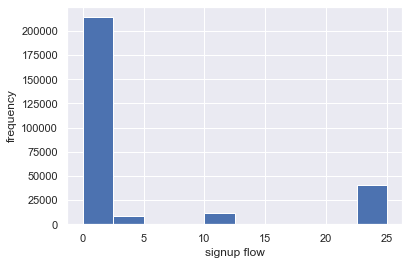

In [15]:

_=plt.hist(users['signup_flow'])
_=plt.xlabel('signup flow')
_=plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

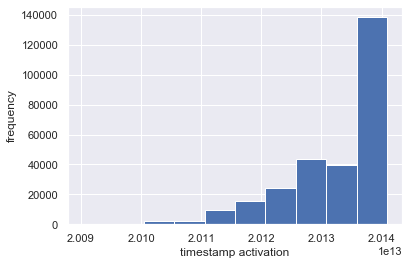

In [16]:
plt.hist(users['timestamp_first_active'])
plt.xlabel("timestamp activation")
plt.ylabel("frequency")

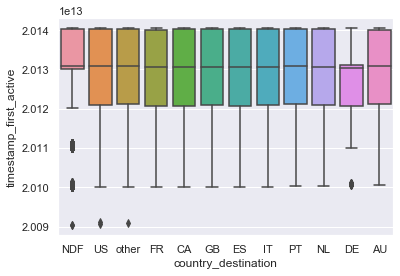

In [17]:
sns.boxplot(x='country_destination',y='timestamp_first_active',data=users)

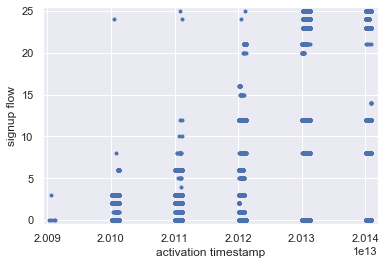

In [18]:

# Make a scatter plot
plt.plot(users.timestamp_first_active,users.signup_flow,marker='.',linestyle='none')


# Set margins
plt.margins(0.02)

# Label the axes
plt.xlabel("activation timestamp")
plt.ylabel("signup flow")

# Show the result
plt.show()

Now,We can make a Bernouli's Distribution where the probability of going to U.S. to be 1 and outside U.S. to be 0.Let's make a CDF out of it.

In [19]:

u=users
u=u[u.country_destination=='US']
len(u)

62376

In [20]:
#Probability of staying at U.S. can be computed by:
p=len(u)/len(users)
p

0.2263715446003767

##### CDF of country destination

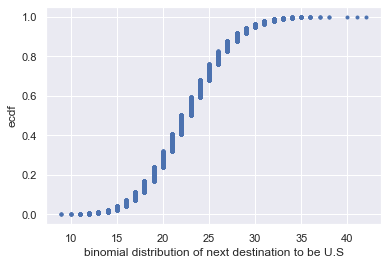

In [21]:
n_defaults=np.random.binomial(100,0.22637,size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel("binomial distribution of next destination to be U.S")
plt.ylabel("ecdf")

# Show the plot
plt.show()

There is about 90% chance of that less than 30 users would choose U.S. to be their next vacation destination.The value of the CDF at x = 30 is about 0.95, so the probability that x < 10 is 0.95. Thus, the probability that x > 10 is 0.05.

C:\Users\Abhilash Naik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


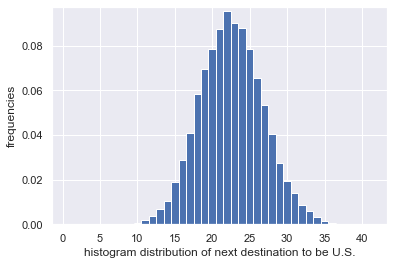

In [22]:
# Compute bin edges: bins
bins = np.arange(0,max(n_defaults)+ 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,normed=True,bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel("histogram distribution of next destination to be U.S.")
plt.ylabel("frequencies")

# Show the plot
plt.show()

The above histogram satifies the Central Limit Theorem and converges to a Normal Distribution Function when taken a large sample size.

Now,let's look into some Pearson Correlation Coefficient.

In [25]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
#r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
#print(r)

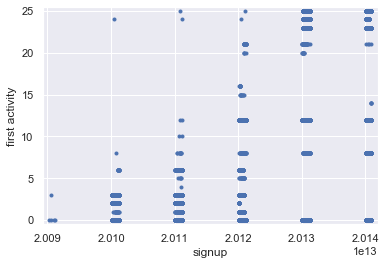

0.23215161202218032


In [26]:
# Plot the age versus timestamp_first_active
_ = plt.plot(users.timestamp_first_active, users.signup_flow, marker='.',linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('signup')
_ = plt.ylabel('first activity')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(users.timestamp_first_active, users.signup_flow))

The Pearson Correlation Coefficient between signup flow and first activity is 0.23215.

In [32]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB


In [33]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [55]:
users2 = pd.get_dummies(users,prefix= ['affiliate_channel'], drop_first= False, columns= ['affiliate_channel'])

In [56]:
users2 = pd.get_dummies(users2,prefix= ['gender'], drop_first= False, columns= ['gender'])

In [57]:
users2 = pd.get_dummies(users2,prefix= ['language'], drop_first= False, columns= ['language'])

In [58]:
users2 = pd.get_dummies(users2,prefix= ['signup_method'], drop_first= False, columns= ['signup_method'])

In [59]:
users2.head()

,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,id,signup_app,...,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo
0,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,gxn3p5htnn,Web,...,0,0,0,0,0,0,0,1,0,0
1,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,820tgsjxq7,Web,...,0,0,0,0,0,0,0,1,0,0
2,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,4ft3gnwmtx,Web,...,0,0,0,0,0,0,1,0,0,0
3,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,bjjt8pjhuk,Web,...,0,0,0,0,0,0,0,1,0,0
4,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,87mebub9p4,Web,...,0,0,0,0,0,0,1,0,0,0


In [60]:
users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 54 columns):
affiliate_provider                 275547 non-null object
age                                158681 non-null float64
country_destination                213451 non-null object
date_account_created               275547 non-null object
date_first_booking                 88908 non-null object
first_affiliate_tracked            269462 non-null object
first_browser                      275547 non-null object
first_device_type                  275547 non-null object
id                                 275547 non-null object
signup_app                         275547 non-null object
signup_flow                        275547 non-null int64
timestamp_first_active             275547 non-null int64
affiliate_channel_api              275547 non-null uint8
affiliate_channel_content          275547 non-null uint8
affiliate_channel_direct           275547 non-null uint8
affiliate_channel_other 

In [61]:
corrmat = users2.corr() 


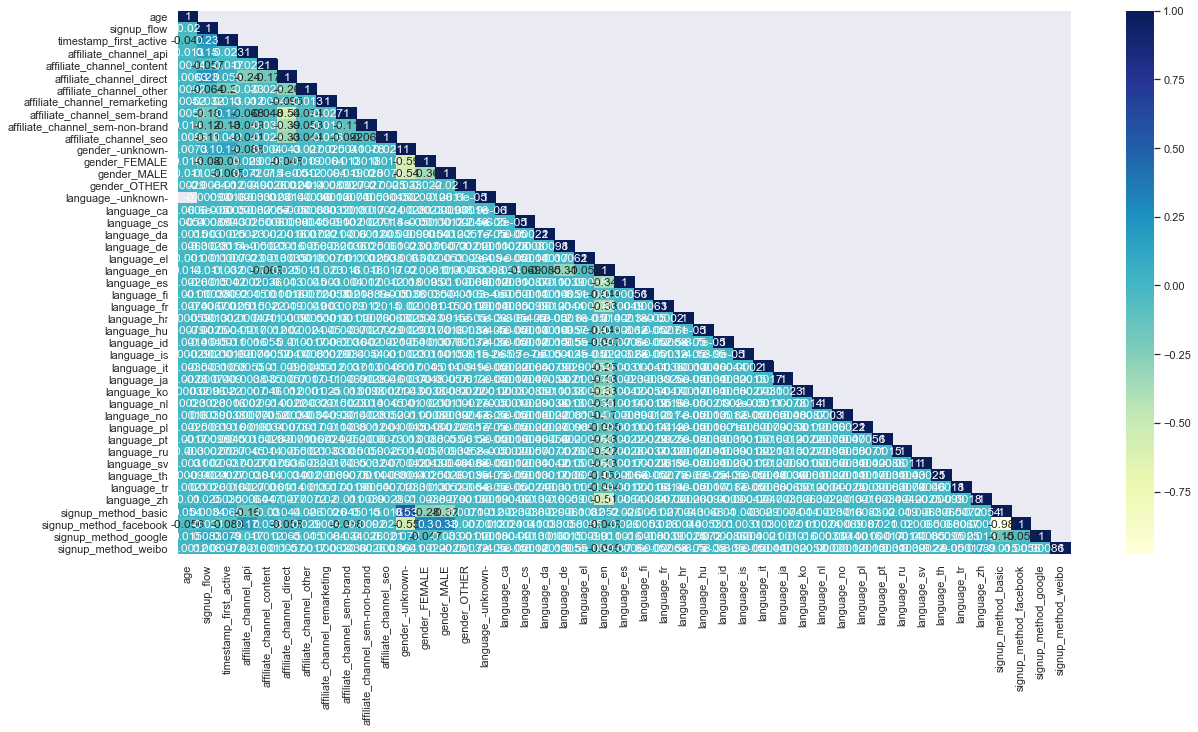

In [62]:
# looking at the correlation between numerical variables
mask = np.array(corrmat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat, mask=mask,annot=True, cmap="YlGnBu")

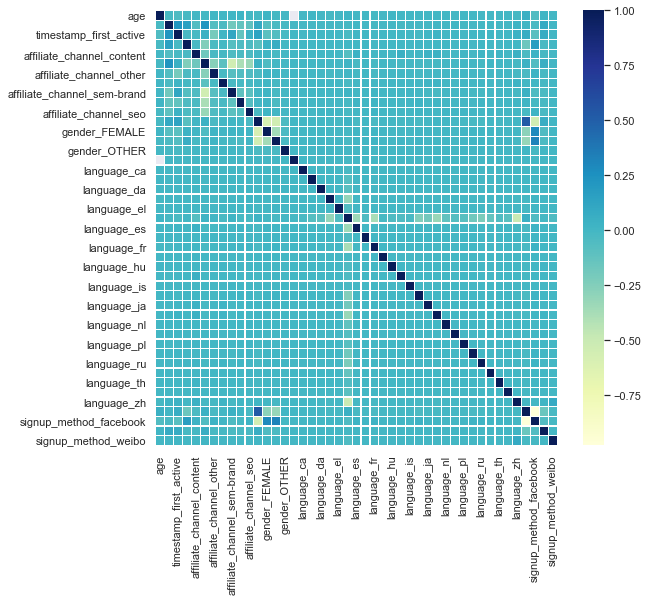

In [63]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 